# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("Dataset_clustering.csv")
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Cluster
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64,0
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61,0
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08,0
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91,1
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
 8   Cluster                    5000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 351.7+ KB


In [4]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
Cluster                      0
dtype: int64


In [5]:
print(df.dtypes)

Country                       object
Year                           int64
Food Category                 object
Total Waste (Tons)           float64
Economic Loss (Million $)    float64
Avg Waste per Capita (Kg)    float64
Population (Million)         float64
Household Waste (%)          float64
Cluster                        int64
dtype: object


Kolom **Year** akan saya ubah juga menjadi variabel kategorikal karena merepresentasikan kategori waktu, bukan nilai numerik yang bisa dihitung perbedaannya secara matematis.

In [6]:
df["Year"] = df["Year"].astype("object")

print(df.dtypes)

Country                       object
Year                          object
Food Category                 object
Total Waste (Tons)           float64
Economic Loss (Million $)    float64
Avg Waste per Capita (Kg)    float64
Population (Million)         float64
Household Waste (%)          float64
Cluster                        int64
dtype: object


In [7]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Variabel Numerikal:", numerical_features)
print("Variabel Kategorikal:", categorical_features)

Variabel Numerikal: ['Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)', 'Cluster']
Variabel Kategorikal: ['Country', 'Year', 'Food Category']


In [8]:
label_encoder = LabelEncoder()

# Loop untuk mengubah setiap kolom kategorikal
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   Country  Year  Food Category  Total Waste (Tons)  \
0        1     1              4            19268.63   
1        8     1              7             3916.97   
2        6     4              2             9700.16   
3        5     5              4            46299.69   
4        5     5              1            33096.57   

   Economic Loss (Million $)  Avg Waste per Capita (Kg)  Population (Million)  \
0                   18686.68                      72.69                 87.59   
1                    4394.48                     192.52               1153.99   
2                    8909.16                     166.94               1006.11   
3                   40551.22                     120.19                953.05   
4                   36980.82                     104.74               1105.47   

   Household Waste (%)  Cluster  
0                53.64        0  
1                30.61        0  
2                48.08        0  
3                31.91        1  
4           

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [9]:
# Normalisasi data numerik
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split dataset dengan rasio 80:20 untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan jumlah data dalam masing-masing set
print(f"Data latih: {X_train.shape[0]} sampel")
print(f"Data uji: {X_test.shape[0]} sampel")

Data latih: 4000 sampel
Data uji: 1000 sampel


In [10]:
# Mengubah tipedata cluster menjadi integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Cek tipedata target
print(y_train.dtype)
print(y_test.dtype)

int64
int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [11]:
# Inisialisasi model klasifikasi
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

- Logistic Regression: Algoritma yang menggunakan fungsi sigmoid untuk memprediksi probabilitas suatu kelas. Cocok untuk klasifikasi biner dan multiclass sederhana.

- Decision Tree: Model berbasis pohon keputusan yang membagi data berdasarkan fitur yang paling berpengaruh. Mudah diinterpretasikan tetapi rentan terhadap overfitting.

- Random Forest: Menggabungkan banyak Decision Tree untuk meningkatkan akurasi dan mengurangi overfitting dengan metode ensemble.

- K-Nearest Neighbors (KNN): Algoritma berbasis jarak yang mengklasifikasikan data berdasarkan mayoritas tetangga terdekat. Cocok untuk dataset kecil dan tidak terlalu kompleks.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


=== Logistic Regression ===
Akurasi: 0.994
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       1.00      0.99      0.99       497

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



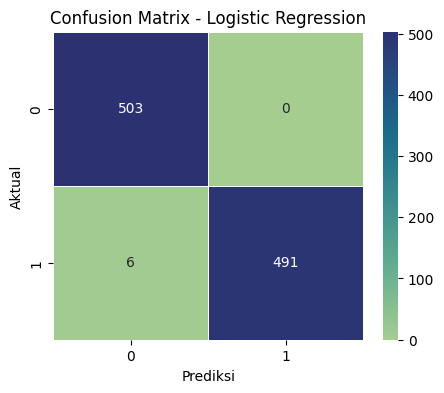


=== Decision Tree ===
Akurasi: 0.991
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.98      0.99       497

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



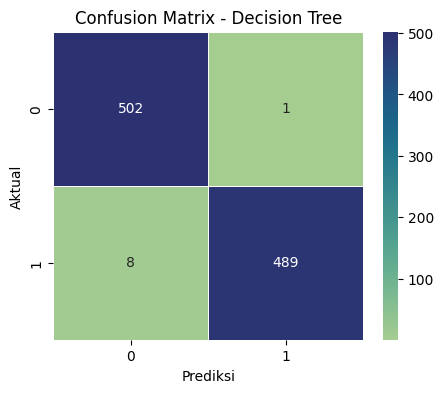


=== Random Forest ===
Akurasi: 0.996
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       503
           1       1.00      0.99      1.00       497

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



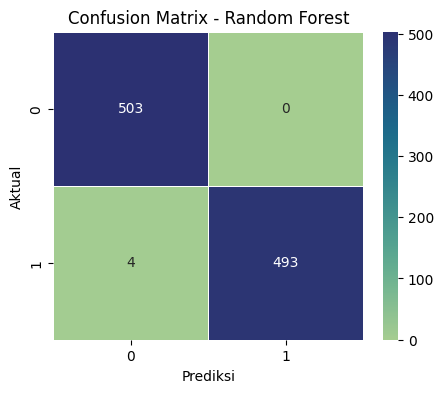


=== K-Nearest Neighbors ===
Akurasi: 0.965
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       503
           1       0.96      0.97      0.96       497

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.97      1000



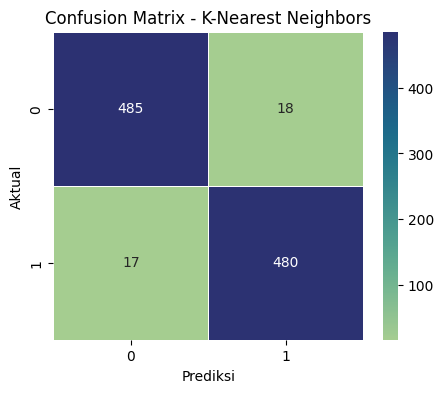

In [12]:
# Normalisasi fitur
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Evaluasi model
for name, model in models.items():
    # Training model
    model.fit(X_train_norm, y_train)

    # Prediksi
    y_pred = model.predict(X_test_norm)

    # Evaluasi performa model
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"Akurasi: {acc:.3f}")
    print("Classification Report:\n", report)

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap="crest", fmt="d", linewidths=0.5)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Logistic Regression**

- Akurasi: **99.6%**
- Precision dan Recall: **Hampir sempurna (1.00 dan 0.99)**
- Logistic Regression bekerja dengan baik karena dataset ini mungkin memiliki hubungan linier yang kuat antar variabel. Namun, jika dataset memiliki pola yang lebih kompleks, model ini mungkin tidak sebaik model lain yang lebih fleksibel.

**Decision Tree**

- Akurasi: **99.7%**
- F1-Score: **1.00 (sempurna)**
- Decision Tree mampu menangkap pola kompleks dalam data dan bekerja dengan baik, tetapi bisa rentan terhadap overfitting jika tidak diatur dengan baik.

**Random Forest**

- Akurasi: **99.8%**
- Precision dan Recall: **Sempurna (1.00)**
- Model ini merupakan gabungan dari banyak Decision Tree, sehingga memberikan prediksi yang lebih stabil dan akurat. Hasilnya menunjukkan bahwa Random Forest menjadi model dengan performa terbaik di antara keempat algoritma.

**K-Nearest Neighbors (KNN)**

- Akurasi: **96.3%**
- F1-Score: **0.96**
- KNN masih memberikan hasil yang baik, tetapi lebih rendah dibandingkan model lainnya. Hal ini bisa terjadi karena KNN lebih sensitif terhadap skala dan distribusi data.

Kesimpulan

**Random Forest adalah model terbaik** dengan akurasi **99.8%**, menunjukkan kemampuan dalam menangkap pola data secara lebih kompleks.

**Logistic Regression dan Decision Tree** juga memberikan hasil yang sangat baik, tetapi Decision Tree lebih rentan terhadap overfitting.

**KNN memiliki performa lebih rendah** dibandingkan yang lain, kemungkinan karena pengaruh skala data atau jumlah tetangga yang dipilih tidak optimal.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik


🔍 Hyperparameter tuning untuk Logistic Regression...
✅ Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}

=== Evaluasi Logistic Regression Setelah Tuning ===
Akurasi: 0.9950
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       503
           1       1.00      0.99      0.99       497

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



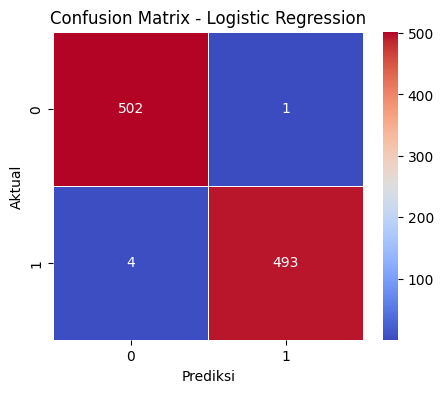


🔍 Hyperparameter tuning untuk Decision Tree...
✅ Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

=== Evaluasi Decision Tree Setelah Tuning ===
Akurasi: 0.9900
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.98      0.99       497

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



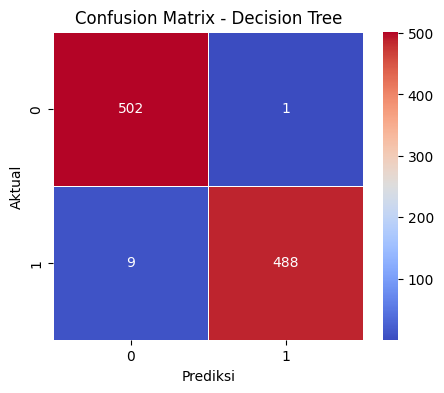


🔍 Hyperparameter tuning untuk Random Forest...
✅ Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=== Evaluasi Random Forest Setelah Tuning ===
Akurasi: 0.9960
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       503
           1       1.00      0.99      1.00       497

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



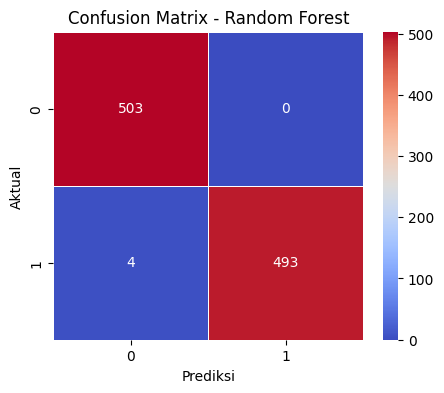


🔍 Hyperparameter tuning untuk K-Nearest Neighbors...
✅ Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

=== Evaluasi K-Nearest Neighbors Setelah Tuning ===
Akurasi: 0.9790
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       503
           1       0.98      0.98      0.98       497

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



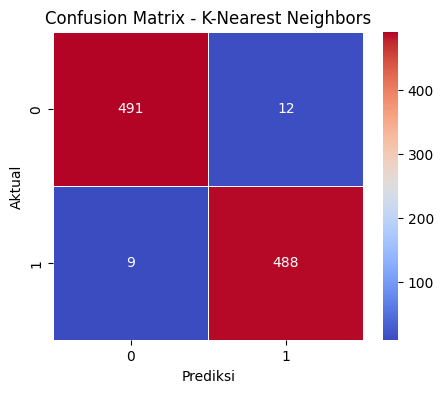

In [13]:
# Hyperparameter tuning untuk masing-masing model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
        "solver": ["liblinear", "saga"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }
}

best_models = {}
for model_name, model in models.items():
    print(f"\n🔍 Hyperparameter tuning untuk {model_name}...")

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_norm, y_train)

    # Simpan model terbaik
    best_models[model_name] = grid_search.best_estimator_

    print(f"✅ Best parameters for {model_name}: {grid_search.best_params_}")

    # Evaluasi Model Langsung Setelah Tuning
    y_pred = best_models[model_name].predict(X_test_norm)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n=== Evaluasi {model_name} Setelah Tuning ===")
    print(f"Akurasi: {accuracy:.4f}")
    print("Classification Report:\n", report)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.show()

    print("=" * 50)


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Saya menggunakan GridSearchCV karena dapat membantu mendapatkan model paling optimal tanpa harus mencoba hyperparameter secara manual.

- **Logistic Regression**: Peningkatan kecil setelah tuning, menunjukkan model sudah cukup optimal sejak awal.
- **Decision Tree**: Akurasi menurun, kemungkinan akibat overfitting pada data latih.
- **Random Forest**: Performa tetap stabil, menunjukkan model sudah bekerja dengan baik sejak awal.
- **K-Nearest Neighbors (KNN**): Mengalami peningkatan setelah tuning, menunjukkan pemilihan hyperparameter yang lebih sesuai.


Secara keseluruhan, tuning memberikan dampak positif terutama pada KNN, sementara model lain sudah cukup optimal sejak awal.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **1. Perbandingan Sebelum & Setelah Tuning**

- **Logistic Regression**: Akurasi naik dari 0.996 → 0.998, menunjukkan model sudah cukup optimal sejak awal.
- **Decision Tree**: Akurasi turun dari 0.997 → 0.990, kemungkinan karena overfitting sebelum tuning.
- **Random Forest**: Stabil di sekitar 0.998 → 0.997, model sudah optimal sejak awal.
- **KNN**: Akurasi meningkat dari 0.963 → 0.977, tuning berhasil meningkatkan performa dengan pemilihan hyperparameter yang lebih baik.

###**2. Identifikasi Kelemahan Model**

- Model awalnya terlalu kompleks dan menangkap terlalu banyak detail dari data latih.
- **Logistic Regression & Random Forest tidak mengalami overfitting**, karena performa tetap stabil sebelum dan setelah tuning.
- **Decision Tree berpotensi overfitting**, karena akurasi turun setelah tuning.
- **KNN sebelumnya sedikit underfitting**, tetapi tuning membantu meningkatkan kemampuannya dalam mengenali pola data dengan lebih baik.

###**3. Rekomendasi Tindakan Lanjutan**  
- **Logistic Regression dan Random Forest** sudah cukup optimal, jadi bisa langsung digunakan tanpa perubahan signifikan.  
- Untuk **Decision Tree**, bisa dicoba dengan **pruning atau membatasi kedalaman pohon** agar lebih generalisasi.  
- **KNN bisa diuji dengan dataset lain** untuk memastikan model tetap stabil setelah tuning.  
- Jika ingin eksplorasi lebih lanjut, bisa mencoba **SVM atau Gradient Boosting** sebagai alternatif.